In [9]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [10]:
df = pd.read_csv("apy.csv")
data = df.dropna()
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)
print(data.shape)
data

(242361, 8)


C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,5.673764e-07
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,3.279592e-07
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,1.151045e-05
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,4.235129e-04


In [11]:
data1 = data.drop(["District_Name","Crop_Year"],axis=1)
data_dum = pd.get_dummies(data1)
data_dum

,Area,Production,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1.416670e-06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,7.083351e-10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,2.273756e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,4.540428e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1.168753e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,306.0,801.0,5.673764e-07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246087,627.0,463.0,3.279592e-07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246088,324.0,16250.0,1.151045e-05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246089,279151.0,597899.0,4.235129e-04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (181770, 165)
x_test : (60591, 165)
y_train : (181770, 1)
y_test : (60591, 1)


In [13]:
filename = 'rf_model.sav'
model=joblib.load(filename)  
predict = model.predict(x_test)

C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [14]:
r = r2_score(y_test,predict)
print("R2score",r)

R2score 0.9995883804885978


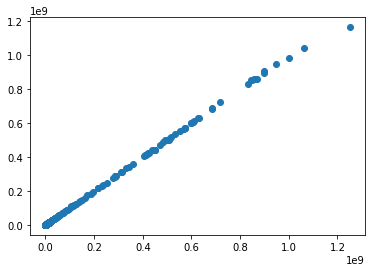

In [15]:
plt.scatter(y_test,predict)